<a href="https://colab.research.google.com/github/Tivertido/PandaZ/blob/main/PythPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('kc-house-data.csv', encoding='ISO-8859-1')

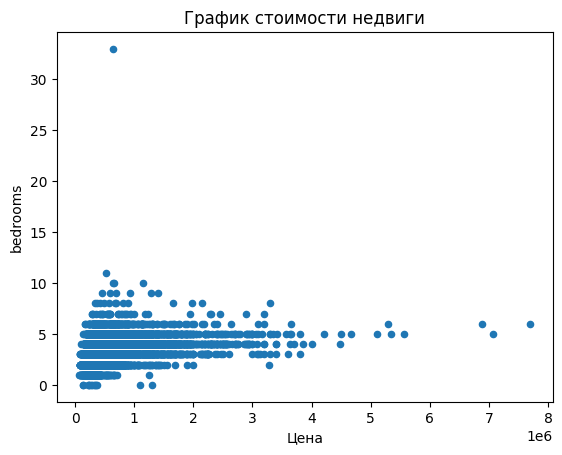

In [ ]:
df.plot.scatter(title='График стоимости недвиги', x='price', y='bedrooms')
plt.xlabel('Цена')
plt.ylabel('bedrooms')
plt.show()

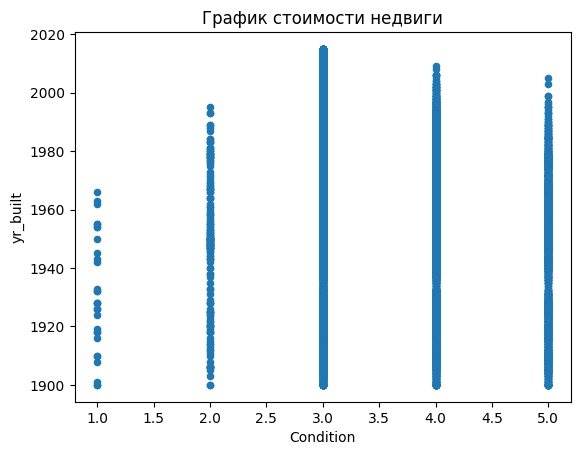

In [ ]:
df.plot.scatter(title='График стоимости недвиги', x='condition', y='yr_built')
plt.xlabel('Condition')
plt.ylabel('yr_built')
plt.show()

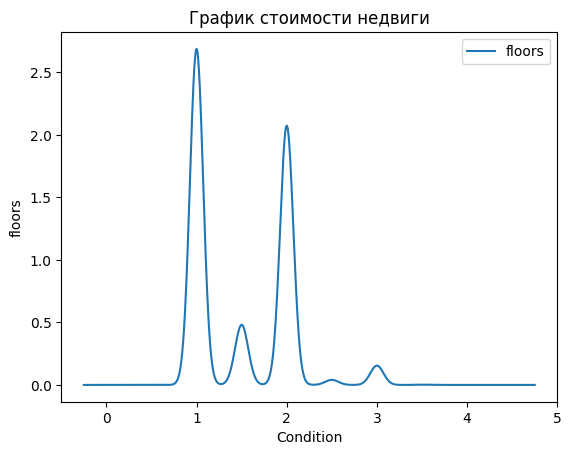

In [ ]:
df.plot.density(title='График стоимости недвиги', x='condition', y='floors')
plt.xlabel('Condition')
plt.ylabel('floors')
plt.show()

Есть зависимость состояния дома от количества этажей - + можно связать с состоянием в зависимости от года постройки и этажность.

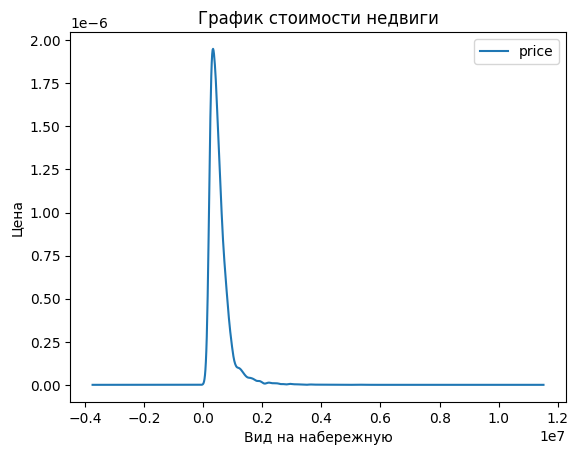

In [ ]:
df.plot.density(title='График стоимости недвиги', x='waterfront', y='price')
plt.xlabel('Вид на набережную')
plt.ylabel('Цена')
plt.show()

Не совсем понятно по данному графику, насколько зависит цена от вида на набережную/приближённость к набережной, но в текущих реалиях - чем ближе к набережной - тем дороже недвига.

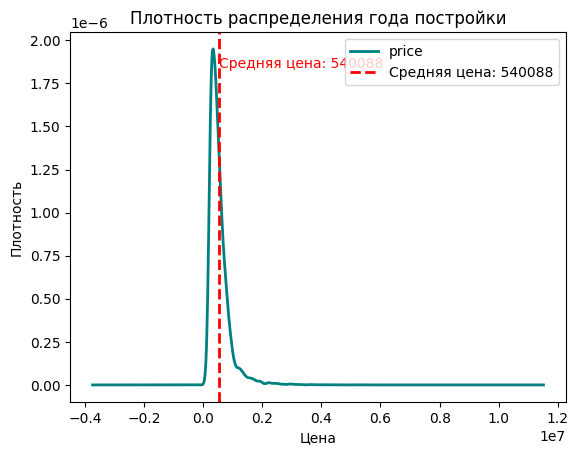

In [ ]:
ax = df['price'].plot.density(title='Плотность распределения года постройки', color='teal', linewidth=2)

plt.xlabel('Цена')
plt.ylabel('Плотность')

price = df['price'].mean()
ax.axvline(price, color='red', linestyle='dashed', linewidth=2, label=f'Средняя цена: {int(price)}')

plt.text(price + 10, ax.get_ylim()[1] * 0.9, f'Средняя цена: {int(price)}', color='red')

plt.legend()

plt.show()

<ipython-input-56-e4b077a00079>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interesting['yr_built'] = current_year - df_interesting['yr_built']
<ipython-input-56-e4b077a00079>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interesting['Цвет'] = pd.cut(df_interesting['yr_built'], bins=[0, 10, 20, 30, 40, 50], labels=['#FF5733', '#FFD933', '#33FF57', '#33D9FF', '#6A33FF'])
<ipython-input-56-e4b077a00079>:8: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated 

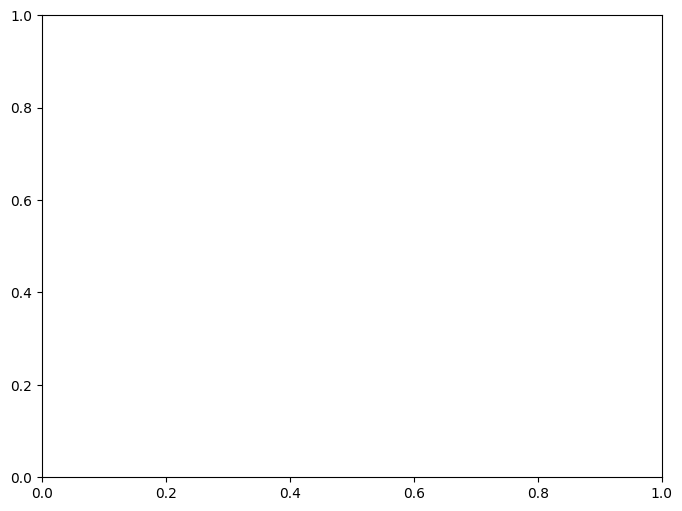

ValueError: ignored

<Figure size 1000x800 with 1 Axes>

In [ ]:
df_interesting = df[['price', 'bedrooms', 'sqft_living', 'yr_built']]

current_year = pd.to_datetime('today').year
df_interesting['yr_built'] = current_year - df_interesting['yr_built']


df_interesting['Цвет'] = pd.cut(df_interesting['yr_built'], bins=[0, 10, 20, 30, 40, 50], labels=['#FF5733', '#FFD933', '#33FF57', '#33D9FF', '#6A33FF'])
df_interesting['Цвет'].cat.add_categories('#FFFFFF', inplace=True)
df_interesting['Цвет'].fillna('#FFFFFF', inplace=True)

fig, ax = plt.subplots(figsize=(8, 6))


ax = df_interesting.plot.scatter(x='sqft_living', y='bedrooms', c=df_interesting['Цвет'], alpha=0.7, edgecolors='w', figsize=(10, 8))
# ax = df_interesting.plot.scatter(x='Квадратура', y='Стоимость', c=df_interesting['Цвет'], alpha=0.7, edgecolors='w', figsize=(10, 8))

plt.title('Влияние квадратуры на bedrooms недвижимости')
plt.xlabel('sqft_living')
plt.ylabel('bedrooms')

plt.text(50, df_interesting['bedrooms'].max() - 50000, 'Цвета представляют возраст недвижимости', fontsize=10)

plt.legend(title='Возраст недвижимости', title_fontsize='12')

plt.show()

In [ ]:
df_interesting = df[['price', 'bedrooms', 'sqft_living', 'yr_built']]

<ipython-input-59-d0d4ac80edd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interesting['Возраст недвижимости'] = current_year - df_interesting['yr_built']
<ipython-input-59-d0d4ac80edd3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interesting['Цвет'] = pd.cut(df_interesting['Возраст недвижимости'], bins=[0, 10, 20, 30, 40, 50], labels=['#FF5733', '#FFD933', '#33FF57', '#33D9FF', '#6A33FF'])
<ipython-input-59-d0d4ac80edd3>:6: FutureWarning: The `inplace` parameter in pandas.Categorical.add_c

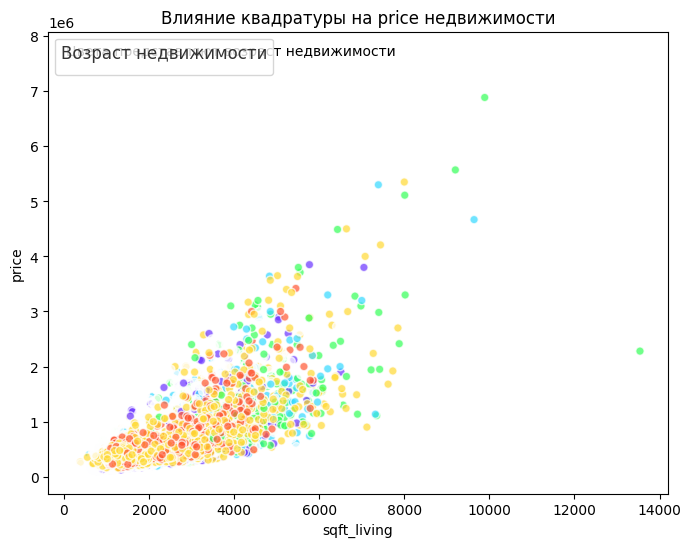

In [ ]:
current_year = pd.to_datetime('today').year
df_interesting['Возраст недвижимости'] = current_year - df_interesting['yr_built']

df_interesting['Цвет'] = pd.cut(df_interesting['Возраст недвижимости'], bins=[0, 10, 20, 30, 40, 50], labels=['#FF5733', '#FFD933', '#33FF57', '#33D9FF', '#6A33FF'])

df_interesting['Цвет'].cat.add_categories('#FFFFFF', inplace=True)
df_interesting['Цвет'].fillna('#FFFFFF', inplace=True)

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(df_interesting['sqft_living'], df_interesting['price'], c=df_interesting['Цвет'], alpha=0.7, edgecolors='w')

ax.set_title('Влияние квадратуры на price недвижимости')
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')

ax.text(50, df_interesting['price'].max() - 50000, 'Цвета представляют возраст недвижимости', fontsize=10)

# Добавляем легенду
legend = ax.legend(title='Возраст недвижимости', title_fontsize='12')
legend.get_title().set_color('#333333')

# Отображаем график
plt.show()